# **Twitter Sentiment Analysis of Apple Stocks**

### Importing Libraries

In [1]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 997.2 kB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
import datetime
import nltk
import yfinance as yf
from nltk.tokenize import TweetTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import PorterStemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Collect Twitter data

In [3]:
twitter_data = pd.read_csv('AAPL_Tweets.csv')
twitter_data.keys()

Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')

In [4]:
twitter_data.keys()

Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')

### Data Preprocessing for Twitter Dataset

In [5]:
print(twitter_data.isnull().sum())

tweet_id           0
writer         10211
post_date          0
body               0
comment_num        0
retweet_num        0
like_num           0
dtype: int64


In [6]:
def clean_data(tweet):
  tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
  tweet = re.sub(r'\@\w+|\#', '', tweet)
  tweet = re.sub(r"[^A-Za-z0-9\s]", '', tweet)
  tweet = tweet.lower()
  return tweet

In [7]:
tokenizer = TweetTokenizer()
def preprocess(tweet):
    tweet = tokenizer.tokenize(tweet)
    return ' '.join([word for word in tweet if word not in (stop_words)])

In [8]:
ps = PorterStemmer()
def stemming(tweet):
    return ' '.join([ps.stem(word) for word in tweet.split()])

In [9]:
twitter_data['body'] = twitter_data['body'].apply(clean_data)
twitter_data['body'] = twitter_data['body'].apply(preprocess)
twitter_data['body'] = twitter_data['body'].apply(stemming)

In [10]:
# Drop unnecessary columns
twitter_data.drop('writer', axis = 'columns',inplace=True)
twitter_data.drop('comment_num', axis = 'columns', inplace=True)
twitter_data.drop('retweet_num', axis = 'columns', inplace=True)
twitter_data.drop('like_num', axis = 'columns', inplace=True)

In [11]:
twitter_data['body']

,body
0,lx21 made 10008 aapl check learn howtotrad exe...
1,insan today weirdo massiv sell aapl bid 45 cen...
2,swing trade 891 return 14 day swingtrad foreca...
3,swing trade 891 return 14 day swingtrad foreca...
4,swing trade 891 return 14 day swingtrad foreca...
...,...
1425008,imagin call brokerdeal want buy good chunk aap...
1425009,aapl yearli heck year jan 2 1999around 2 3 buc...
1425010,spi spx puuump last hour eoy eoq eom top windo...
1425011,dont discrimin aapl msft


### Sentiment Analysis Using VADER

In [12]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

twitter_data['sentiment_scores'] = twitter_data['body'].apply(get_sentiment_scores)
twitter_data['compound'] = twitter_data['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
twitter_data['positive'] = twitter_data['sentiment_scores'].apply(lambda score_dict: score_dict['pos'])
twitter_data['neutral'] = twitter_data['sentiment_scores'].apply(lambda score_dict: score_dict['neu'])
twitter_data['negative'] = twitter_data['sentiment_scores'].apply(lambda score_dict: score_dict['neg'])

print(twitter_data[['body', 'compound']])

                                                      body  compound
0        lx21 made 10008 aapl check learn howtotrad exe...    0.0000
1        insan today weirdo massiv sell aapl bid 45 cen...   -0.6124
2        swing trade 891 return 14 day swingtrad foreca...    0.0000
3        swing trade 891 return 14 day swingtrad foreca...    0.0000
4        swing trade 891 return 14 day swingtrad foreca...    0.0000
...                                                    ...       ...
1425008  imagin call brokerdeal want buy good chunk aap...    0.6597
1425009  aapl yearli heck year jan 2 1999around 2 3 buc...    0.7783
1425010  spi spx puuump last hour eoy eoq eom top windo...   -0.5574
1425011                           dont discrimin aapl msft    0.0000
1425012  aapl patent 10522475 vertic interconnect self ...    0.0000

[1425013 rows x 2 columns]


<Axes: ylabel='Frequency'>

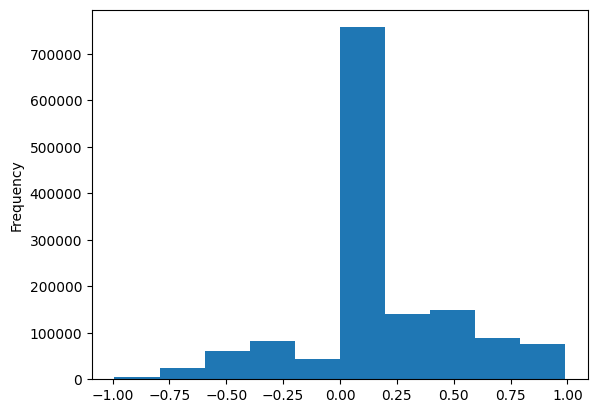

In [13]:
# Plot the histogram
twitter_data['compound'].plot(kind = "hist")

### Download Historical Stock Prices

In [14]:
hist_data = yf.download('AAPL','2015-01-02','2019-12-31')
hist_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687298,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689531,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021717,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944675,237458000
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908981,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342964,93121200


### Data Preprocessing for Historical Stock Prices

In [15]:
date_range = pd.date_range(start='2015-01-02', end='2019-12-30', freq='D')
hist_data = hist_data.reindex(date_range)
hist_data= hist_data.interpolate(method='linear')
hist_data.dropna()
hist_data.head(15)

,Open,High,Low,Close,Adj Close,Volume
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373959,2.128184e+08
2015-01-03,27.589167,27.627501,26.675833,27.075834,24.145072,2.275929e+08
2015-01-04,27.330833,27.395000,26.514167,26.819167,23.916185,2.423675e+08
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687298,2.571420e+08
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689531,2.631884e+08
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021717,1.604236e+08
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944675,2.374580e+08
2015-01-09,28.167500,28.312500,27.552500,28.002501,24.971439,2.147980e+08
2015-01-10,28.161666,28.260833,27.435000,27.772500,24.766334,2.093997e+08
2015-01-11,28.155833,28.209166,27.317500,27.542500,24.561228,2.040015e+08


In [16]:
twitter_data

,tweet_id,post_date,body,sentiment_scores,compound,positive,neutral,negative
0,550441509175443456,2015-01-01 00:00:57,lx21 made 10008 aapl check learn howtotrad exe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
1,550441672312512512,2015-01-01 00:01:36,insan today weirdo massiv sell aapl bid 45 cen...,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.6124,0.000,0.722,0.278
2,550443807834402816,2015-01-01 00:10:05,swing trade 891 return 14 day swingtrad foreca...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
3,550443808606126081,2015-01-01 00:10:05,swing trade 891 return 14 day swingtrad foreca...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
4,550443809700851716,2015-01-01 00:10:05,swing trade 891 return 14 day swingtrad foreca...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
1425008,1212159254884433921,2019-12-31 23:51:01,imagin call brokerdeal want buy good chunk aap...,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.6597,0.390,0.610,0.000
1425009,1212159275637886976,2019-12-31 23:51:06,aapl yearli heck year jan 2 1999around 2 3 buc...,"{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp...",0.7783,0.298,0.702,0.000
1425010,1212159765914079234,2019-12-31 23:53:03,spi spx puuump last hour eoy eoq eom top windo...,"{'neg': 0.115, 'neu': 0.838, 'pos': 0.047, 'co...",-0.5574,0.047,0.838,0.115
1425011,1212160410692046849,2019-12-31 23:55:37,dont discrimin aapl msft,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000


In [17]:
twitter_data.columns

Index(['tweet_id', 'post_date', 'body', 'sentiment_scores', 'compound',
       'positive', 'neutral', 'negative'],
      dtype='object')

In [18]:
# Calculate daily sentiment score
twitter_data['post_date'] = pd.to_datetime(twitter_data['post_date'])
twitter_data.set_index('post_date', inplace=True)
daily_sentiment = twitter_data.resample('D').agg({
    'compound': 'mean',
    'positive': 'mean',
    'neutral': 'mean',
    'negative': 'mean'
})

In [19]:
print(daily_sentiment)

            compound  positive   neutral  negative
post_date                                         
2015-01-01  0.105867  0.089863  0.878615  0.031542
2015-01-02  0.083845  0.089467  0.865566  0.044968
2015-01-03  0.215933  0.122315  0.850419  0.027257
2015-01-04  0.191860  0.109387  0.864534  0.026074
2015-01-05  0.116226  0.099225  0.855036  0.045738
...              ...       ...       ...       ...
2019-12-27  0.139579  0.101420  0.856126  0.042444
2019-12-28  0.154987  0.094781  0.884576  0.020638
2019-12-29  0.185072  0.109205  0.861089  0.029711
2019-12-30  0.178688  0.118887  0.842811  0.038306
2019-12-31  0.131103  0.095476  0.867366  0.037152

[1826 rows x 4 columns]


In [20]:
# Merge two datasets
combined_data = pd.merge(daily_sentiment, hist_data, left_index=True, right_index=True, how='inner')
combined_data.shape

(1824, 10)

In [21]:
combined_data

,compound,positive,neutral,negative,Open,High,Low,Close,Adj Close,Volume
2015-01-02,0.083845,0.089467,0.865566,0.044968,27.847500,27.860001,26.837500,27.332500,24.373959,2.128184e+08
2015-01-03,0.215933,0.122315,0.850419,0.027257,27.589167,27.627501,26.675833,27.075834,24.145072,2.275929e+08
2015-01-04,0.191860,0.109387,0.864534,0.026074,27.330833,27.395000,26.514167,26.819167,23.916185,2.423675e+08
2015-01-05,0.116226,0.099225,0.855036,0.045738,27.072500,27.162500,26.352501,26.562500,23.687298,2.571420e+08
2015-01-06,0.136152,0.109782,0.846006,0.044217,26.635000,26.857500,26.157499,26.565001,23.689531,2.631884e+08
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,0.147643,0.100492,0.863174,0.036327,71.205002,72.495003,71.175003,72.477501,70.342964,9.312120e+07
2019-12-27,0.139579,0.101420,0.856126,0.042444,72.779999,73.492500,72.029999,72.449997,70.316277,1.462660e+08
2019-12-28,0.154987,0.094781,0.884576,0.020638,72.641665,73.385834,71.788333,72.593330,70.455388,1.455488e+08
2019-12-29,0.185072,0.109205,0.861089,0.029711,72.503332,73.279167,71.546666,72.736664,70.594500,1.448316e+08


In [22]:
print(daily_sentiment.isnull().sum())

compound    7
positive    7
neutral     7
negative    7
dtype: int64


In [23]:
null_rows = daily_sentiment[daily_sentiment.isnull().any(axis=1)]
print(null_rows)

            compound  positive  neutral  negative
post_date                                        
2015-02-15       NaN       NaN      NaN       NaN
2015-03-25       NaN       NaN      NaN       NaN
2015-05-09       NaN       NaN      NaN       NaN
2015-07-07       NaN       NaN      NaN       NaN
2015-08-22       NaN       NaN      NaN       NaN
2015-10-11       NaN       NaN      NaN       NaN
2015-12-16       NaN       NaN      NaN       NaN


In [24]:
twitter_data['compound']

,compound
post_date,
2015-01-01 00:00:57,0.0000
2015-01-01 00:01:36,-0.6124
2015-01-01 00:10:05,0.0000
2015-01-01 00:10:05,0.0000
2015-01-01 00:10:05,0.0000
...,...
2019-12-31 23:51:01,0.6597
2019-12-31 23:51:06,0.7783
2019-12-31 23:53:03,-0.5574


In [25]:
# Save combined dataset
combined_data.to_csv('AAPL_Combined_dataset.csv', index=True)